<a href="https://colab.research.google.com/github/JordanHalas/Halas-Fall-2023/blob/main/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

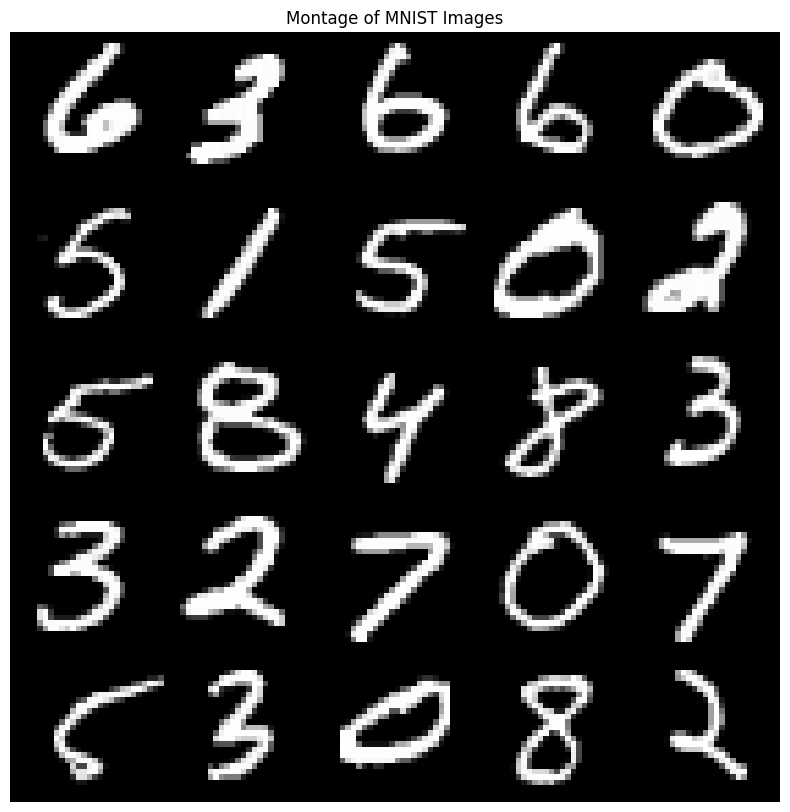

Random Slope (m): 0.8327618823744887
Sample Predictions: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Accuracy of Random Walk Model: 50.35%


In [2]:
# Task 1: Load MNIST and Show Montage
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST data
(x_train, _), (_, _) = mnist.load_data()

# Create a montage of random MNIST images
plt.figure(figsize=(10, 10))
montage = np.zeros((28 * 5, 28 * 5))

for i in range(5):
    for j in range(5):
        montage[i * 28: (i + 1) * 28, j * 28: (j + 1) * 28] = x_train[np.random.randint(0, x_train.shape[0])]

# Display the montage
plt.imshow(montage, cmap='gray')
plt.axis('off')
plt.title('Montage of MNIST Images')
plt.show()

# Task 2: Run Random y=mx Model on MNIST
m = np.random.rand()
x_train_flat = x_train.reshape(x_train.shape[0], -1)
predictions = m * x_train_flat

# Display random slope and sample predictions
print(f"Random Slope (m): {m}")
print(f"Sample Predictions: {predictions[:5]}")

# Task 3: Train random walk model to at least 75%
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Flatten the MNIST images
x_train_flat = x_train.reshape(x_train.shape[0], -1)

# Create random labels for the random walk model
y_random_walk = np.random.randint(0, 2, size=x_train_flat.shape[0])

# Split the data into training and testing sets
x_train_rw, x_test_rw, y_train_rw, y_test_rw = train_test_split(x_train_flat, y_random_walk, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x_train_rw, y_train_rw)

# Make predictions on the test set
y_pred_rw = rf_classifier.predict(x_test_rw)

# Calculate and display the accuracy of the random walk model
accuracy = accuracy_score(y_test_rw, y_pred_rw)
print(f"Accuracy of Random Walk Model: {accuracy * 100:.2f}%")
